In [1]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# read the dataset and load into a pandas dataframe
data = pd.read_csv("sudan dataset.csv")
data.head(
)

,adm2_name,adm2_code,adm1_name,AreaKm2,AreaFLRisk,PercFLRisk,PercFLClas,FLMaxFreq,FLMaxClass,FloodRisk,FloodClass,FloodText
0,Jebal Aulya,0,Khartoum,780,116,15,2,28,3,5,3,High
1,Um Badah,1,Khartoum,3469,2,0,1,2,1,2,1,Low
2,Bahri (Khartoum North),2,Khartoum,3200,202,6,1,21,3,4,2,Medium
3,Sharq El Nile,3,Khartoum,9471,631,7,1,17,3,4,2,Medium
4,Karari,4,Khartoum,2916,72,2,1,21,3,4,2,Medium


In [3]:
# checking the shape of the dataset
print("Rows in dataset: ",data.shape[0])
print("Columns in dataset: ",data.shape[1])

Rows in dataset:  172
Columns in dataset:  12


In [4]:
# checking if there is any missing value in the data
data.isnull().sum()

adm2_name     0
adm2_code     0
adm1_name     0
AreaKm2       0
AreaFLRisk    0
PercFLRisk    0
PercFLClas    0
FLMaxFreq     0
FLMaxClass    0
FloodRisk     0
FloodClass    0
FloodText     0
dtype: int64

## Data Cleaning

In [5]:
# Dropping column adm2_name, adm2_code and adm1_name since it does not have a correlation with target variable
data.drop(columns=["adm2_name", "adm2_code", "adm1_name"],inplace=True)
data.head()

,AreaKm2,AreaFLRisk,PercFLRisk,PercFLClas,FLMaxFreq,FLMaxClass,FloodRisk,FloodClass,FloodText
0,780,116,15,2,28,3,5,3,High
1,3469,2,0,1,2,1,2,1,Low
2,3200,202,6,1,21,3,4,2,Medium
3,9471,631,7,1,17,3,4,2,Medium
4,2916,72,2,1,21,3,4,2,Medium


In [6]:
# Also the FloodText, FloodClass columns are a representation of the FloodRisk column, so we drop FloodText & FloodClass columns
data.drop(columns=["FloodText", "FloodClass"],inplace=True)
data.head()

,AreaKm2,AreaFLRisk,PercFLRisk,PercFLClas,FLMaxFreq,FLMaxClass,FloodRisk
0,780,116,15,2,28,3,5
1,3469,2,0,1,2,1,2
2,3200,202,6,1,21,3,4
3,9471,631,7,1,17,3,4
4,2916,72,2,1,21,3,4


## Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
# transform and map pokemon generations
label_func = LabelEncoder()
labels = label_func.fit_transform(data['FloodRisk'])
data['labelled'] = labels
data.drop(columns = ["FloodRisk"], inplace=True)
data.rename(columns={'labelled':'FloodRisk'}, inplace=True)
data.head(10)

,AreaKm2,AreaFLRisk,PercFLRisk,PercFLClas,FLMaxFreq,FLMaxClass,FloodRisk
0,780,116,15,2,28,3,3
1,3469,2,0,1,2,1,0
2,3200,202,6,1,21,3,2
3,9471,631,7,1,17,3,2
4,2916,72,2,1,21,3,2
5,1221,191,16,2,28,3,3
6,167,73,44,3,28,3,4
7,50337,963,2,1,10,2,1
8,45254,275,1,1,14,2,1
9,9273,556,6,1,21,3,2


## Data Splitting

In [8]:
# Splitting the data into dependent variables(X) and the required target valiable(Y)
X = data.iloc[:,0:6]
Y = data["FloodRisk"]

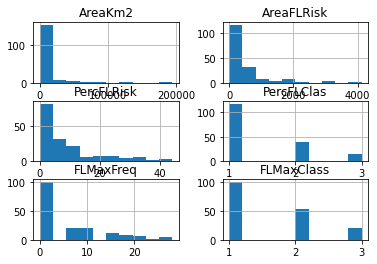

In [9]:
# checking the distribution of data by plotting a histogram
X.iloc[:,:].hist()
plt.show()

## Data Normalization

In [10]:
# Since the is not distributed evenly, we can scale it in the range of 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X).transform(X)

array([[3.78468437e-03, 2.81621753e-02, 3.40909091e-01, 5.00000000e-01,
        1.00000000e+00, 1.00000000e+00],
       [1.76121521e-02, 4.85554746e-04, 0.00000000e+00, 0.00000000e+00,
        7.14285714e-02, 0.00000000e+00],
       [1.62288911e-02, 4.90410294e-02, 1.36363636e-01, 0.00000000e+00,
        7.50000000e-01, 1.00000000e+00],
       ...,
       [1.50770307e-02, 4.85554746e-04, 0.00000000e+00, 0.00000000e+00,
        7.14285714e-02, 0.00000000e+00],
       [1.58586503e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.15031779e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

## Train Test Splitting

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

## Loading the models and Training

In [12]:
# Importing the required libraries and loading models
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

naive_bayes = GaussianNB()
dec_tree = tree.DecisionTreeClassifier()
svm_model = svm.SVC()
KNN = KNeighborsClassifier(5)

In [13]:
# Training the models on the training sets
naive_bayes.fit(X_train, Y_train)
dec_tree.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)
KNN.fit(X_train, Y_train)

KNeighborsClassifier()

## Making Predictions using trained models

In [14]:
Y_pred1 = naive_bayes.predict(X_test)
Y_pred2 = dec_tree.predict(X_test)
Y_pred3 = svm_model.predict(X_test)
Y_pred4 = KNN.predict(X_test)

In [15]:
# Comparing the accuracy score of all the four models
print("\t\tACCURACY SCORES")
print("Naive Bayes Classifier: ",accuracy_score(Y_test,Y_pred1))
print("Decision Tree Classifier: ",accuracy_score(Y_test,Y_pred2))
print("Support Vector Machine: ",accuracy_score(Y_test,Y_pred3))
print("K-Nearest Neighbour(KNN): ",accuracy_score(Y_test,Y_pred4))

		ACCURACY SCORES
Naive Bayes Classifier:  0.8285714285714286
Decision Tree Classifier:  0.9714285714285714
Support Vector Machine:  0.5428571428571428
K-Nearest Neighbour(KNN):  0.4857142857142857


<BarContainer object of 4 artists>

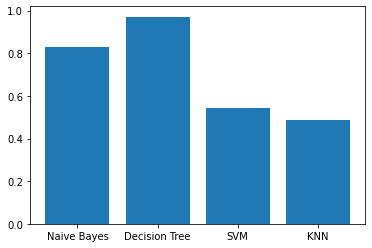

In [16]:
plt.bar(['Naive Bayes', 'Decision Tree', 'SVM', 'KNN'], [accuracy_score(Y_test,Y_pred1),accuracy_score(Y_test,Y_pred2),accuracy_score(Y_test,Y_pred3),accuracy_score(Y_test,Y_pred4)])

In [17]:
# Function for Plotting the Confusion Matrix
import seaborn as sns
def plot_cm(cm_df, algo_name):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix'+algo_name)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [18]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred1)
cm2 = confusion_matrix(Y_test, Y_pred2)
cm3 = confusion_matrix(Y_test, Y_pred3)
cm4 = confusion_matrix(Y_test, Y_pred4)

cm_df1 = pd.DataFrame(cm1, index = [0,1,2,3,4], columns = [0,1,2,3,4])
cm_df2 = pd.DataFrame(cm2, index = [0,1,2,3,4], columns = [0,1,2,3,4])
cm_df3 = pd.DataFrame(cm3, index = [0,1,2,3,4], columns = [0,1,2,3,4])
cm_df4 = pd.DataFrame(cm4, index = [0,1,2,3,4], columns = [0,1,2,3,4])

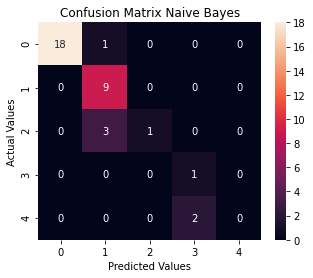

In [19]:
plot_cm(cm_df1," Naive Bayes")

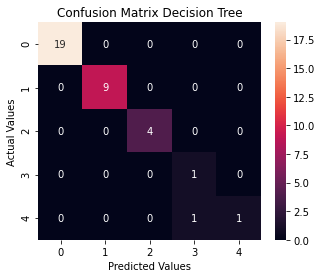

In [20]:
plot_cm(cm_df2," Decision Tree")

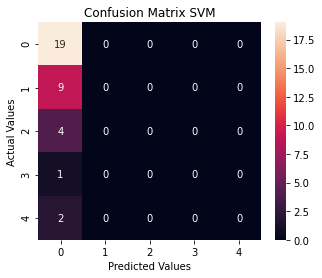

In [21]:
plot_cm(cm_df3," SVM")

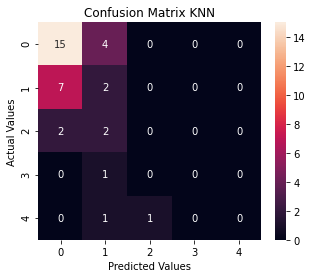

In [22]:
plot_cm(cm_df4, " KNN")

## Result Analysis
From the above accuracy scores, we can say that Naive Bayes Classifier has the best prediction among the 4 models.
Though Decision Tree Classifier has an accuracy score of 100%, it clearly shows that the model is overfitted on the data because the data available is quite less.
So we can rely greatly upon Naive Bayes Classifier for predicting the risk of flood in a area.
            Flood Risk                Flood Class<br>
            1)    0  -->                    Low Risk<br>
            2)    1  -->                   Medium Risk<br>
            3)    2  -->                   Medium Risk<br>
            4)    3  -->                    High Risk<br>
            5)    4  -->                    High Risk<br>

## How the model might help in reducing Flood After Effects
If we get an idea of the intensity and the class of flood, classified as High Risk(3-4) / Medium Risk(1-2) / Low Risk(0), we can put the rescue teams to operate accordingly on specific zones, where the FloodClass or Risk is High.
Thus the above AI solution might help in reducing the loss of life and damage by predicting the intensity of flood risk beforehand in specific regions by taking into account the various attributes like AreaFLRisk , AreaKm2, etc.

## Model Persistence

In [23]:
# Exporting the models
import joblib
joblib.dump(naive_bayes,'NaiveBayesClassifier.joblib')
joblib.dump(dec_tree,'DecisionTreeClassifier.joblib')
joblib.dump(svm_model,'SVM_model.joblib')
joblib.dump(KNN,'KNearestNeighbour.joblib')

['KNearestNeighbour.joblib']

## Loading the model
we can load the "model_name.joblib" file by importing the joblib library then,
> model = joblib.load('model_name.joblib')

To make predictions using the model, we can pass a numpy nd-array to the loaded model as,
> predictions = model_loaded.predict([[YEAR,JAN,FEB,MAR,APR,MAY,JUN,JULY,AUG,SEP,OCT,NOV,DEV], [..], .....)